# Advanced_EDA_Forecasting

Phase 2

Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import os

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

Load Cleaned Data

In [2]:
# Load the cleaned data from Phase 1
df = pd.read_csv("output_phase1/cleaned_sales_data.csv")
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,Month Name
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,November
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,November
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,June
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,October
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,October


Top Products

Top 10 Products:
 Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


C:\Users\Tab & Tech\AppData\Local\Temp\ipykernel_1436\284937469.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


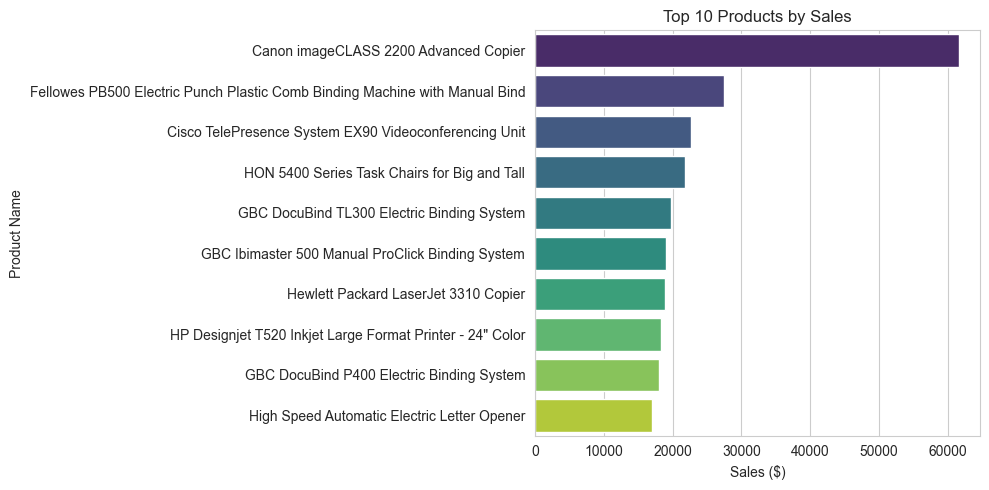

In [3]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products:\n", top_products)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales ($)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

Top Customers

Top 10 Customers:
 Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


C:\Users\Tab & Tech\AppData\Local\Temp\ipykernel_1436\2084090553.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='magma')


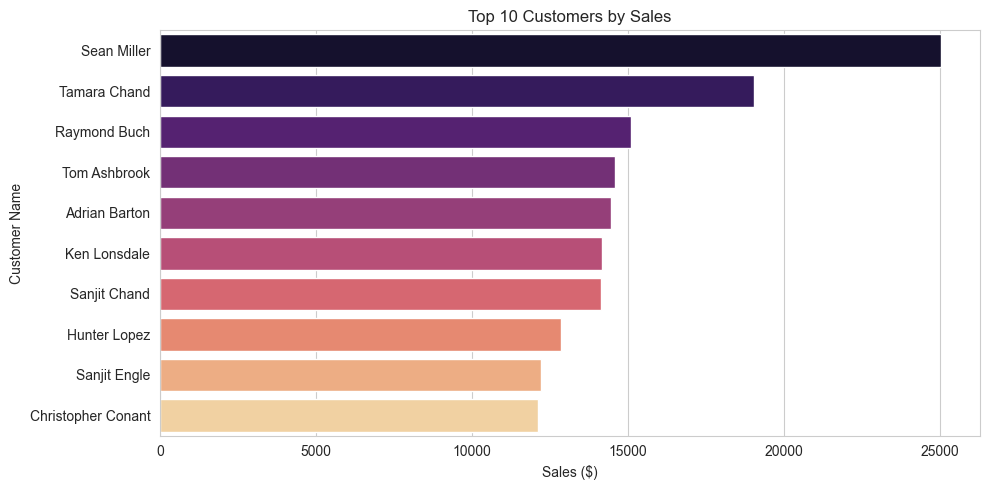

In [4]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers:\n", top_customers)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='magma')
plt.title("Top 10 Customers by Sales")
plt.xlabel("Sales ($)")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.show()

Shipping Mode Analysis

Sales by Ship Mode:
 Ship Mode
Standard Class    1.340831e+06
Second Class      4.499142e+05
First Class       3.455723e+05
Same Day          1.252190e+05
Name: Sales, dtype: float64


C:\Users\Tab & Tech\AppData\Local\Temp\ipykernel_1436\2644754676.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ship_mode_sales.index, y=ship_mode_sales.values, palette='cool')


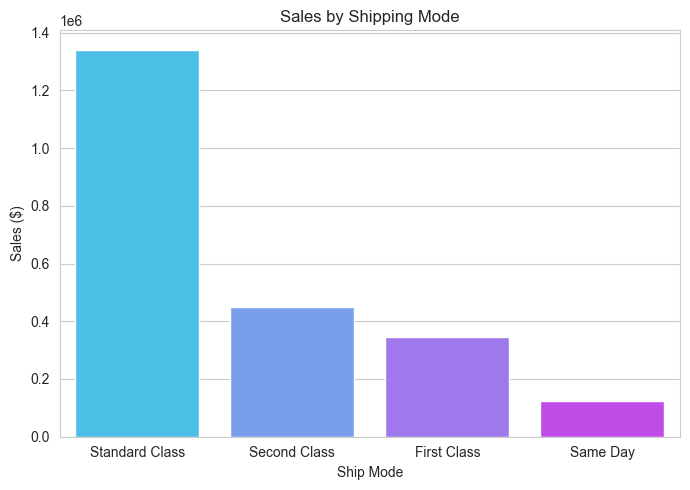

In [5]:
ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)
print("Sales by Ship Mode:\n", ship_mode_sales)

plt.figure(figsize=(7,5))
sns.barplot(x=ship_mode_sales.index, y=ship_mode_sales.values, palette='cool')
plt.title("Sales by Shipping Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Sales ($)")
plt.tight_layout()
plt.show()

Sales Forecasting

c:\Users\Tab & Tech\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


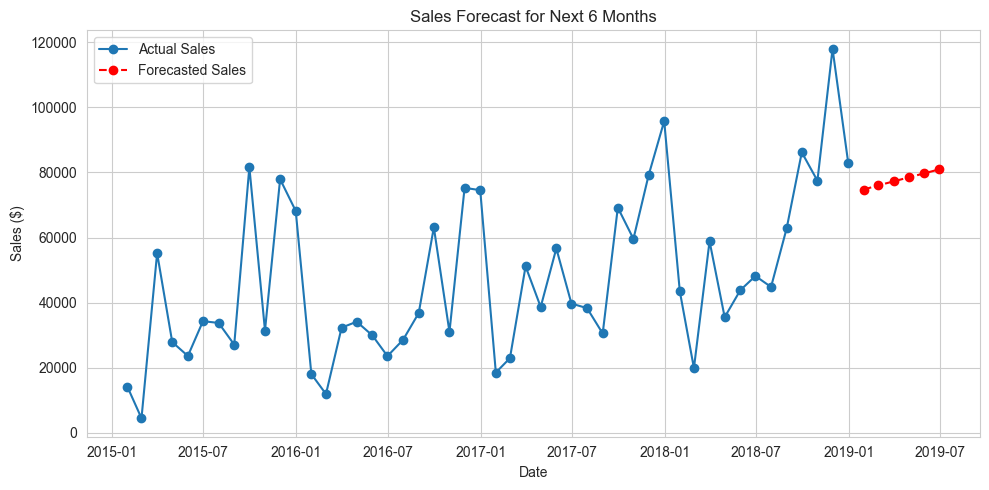

In [8]:
# Prepare monthly revenue
monthly_revenue = df.groupby(pd.Grouper(key='Order Date', freq='ME'))['Sales'].sum().reset_index()
monthly_revenue.set_index('Order Date', inplace=True)

# Build Exponential Smoothing Model
model = ExponentialSmoothing(monthly_revenue['Sales'], trend='add', seasonal=None)
fit = model.fit()

# Forecast next 6 months
forecast = fit.forecast(6)
forecast_dates = pd.date_range(monthly_revenue.index[-1] + pd.offsets.MonthBegin(1), periods=6, freq='ME')

# Plot Actual vs Forecasted Sales
plt.figure(figsize=(10,5))
plt.plot(monthly_revenue.index, monthly_revenue['Sales'], label='Actual Sales', marker='o')
plt.plot(forecast_dates, forecast, label='Forecasted Sales', marker='o', linestyle='--', color='red')
plt.title('Sales Forecast for Next 6 Months')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.tight_layout()
plt.show()

# Save forecast data
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted Sales': forecast})
os.makedirs("output_phase2", exist_ok=True)
forecast_df.to_csv("output_phase2/sales_forecast.csv", index=False)

Save Advanced Outputs

In [9]:
top_products.to_csv("output_phase2/top_products.csv")
top_customers.to_csv("output_phase2/top_customers.csv")
ship_mode_sales.to_csv("output_phase2/ship_mode_sales.csv")
monthly_revenue.to_csv("output_phase2/monthly_revenue.csv")
print("Advanced EDA outputs saved in 'output_phase2'")

Advanced EDA outputs saved in 'output_phase2'
